In [2]:
!pip install opencv-python-headless matplotlib

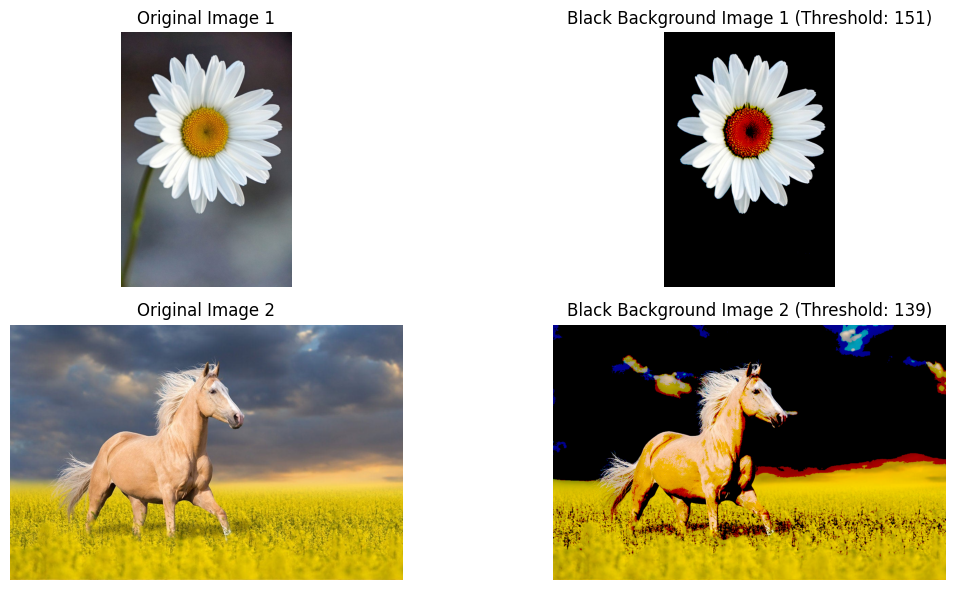

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image1_path = 'image1.jpg'
image2_path = 'image2.jpg'

image1 = cv2.imread(image1_path, cv2.IMREAD_COLOR)
image2 = cv2.imread(image2_path, cv2.IMREAD_COLOR)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')
plt.axis('off')

def otsu_threshold(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist, _ = np.histogram(gray_image, bins=256, range=(0, 256))
    total_pixels = gray_image.size
    pdf = hist / total_pixels

    cumulative_sum = np.cumsum(pdf)
    cumulative_mean = np.cumsum(pdf * np.arange(256))
    overall_mean = cumulative_mean[-1]

    max_variance = 0
    best_threshold = 0

    for t in range(256):
        if cumulative_sum[t] == 0:
            continue
        if cumulative_sum[t] == 1:
            break

        w1 = cumulative_sum[t]
        w2 = 1 - w1

        mu1 = cumulative_mean[t] / w1
        mu2 = (overall_mean - cumulative_mean[t]) / w2

        between_class_variance = w1 * w2 * (mu1 - mu2) ** 2

        if between_class_variance > max_variance:
            max_variance = between_class_variance
            best_threshold = t

    return best_threshold

threshold_value1 = otsu_threshold(image1)
threshold_value2 = otsu_threshold(image2)

colored_image1 = np.zeros_like(image1)
colored_image1[image1 > threshold_value1] = image1[image1 > threshold_value1]

colored_image2 = np.zeros_like(image2)
colored_image2[image2 > threshold_value2] = image2[image2 > threshold_value2]

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(colored_image1, cv2.COLOR_BGR2RGB))
plt.title(f'Black Background Image 1 (Threshold: {threshold_value1})')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(colored_image2, cv2.COLOR_BGR2RGB))
plt.title(f'Black Background Image 2 (Threshold: {threshold_value2})')
plt.axis('off')

plt.tight_layout()
plt.show()